In [4]:
import os
import sys
import subprocess
from PIL import Image

In [2]:
### Convert gif to first picture frame in jpg

# Imgpath = 'C:/Users/asus/Documents/test.gif'

def processImage(infile):
    try:
        im = Image.open(infile)
    except IOError:
        print ("Cant load image", infile)
        sys.exit(1)
    i = 0
    mypalette = im.getpalette()

    try:
        while 1:
            im.putpalette(mypalette)
            new_im = Image.new("RGBA", im.size)
            new_im.paste(im)
            return new_im
#             new_im.save('C:/Users/asus/Documents/foo'+str(i)+'.png')

#             i += 1
#             im.seek(im.tell() + 1)
#             print('save' + str(i))

    except EOFError:
        pass # end of sequence

# processImage(Imgpath)

In [3]:
### Convert filenames into text file if filenames are too long
def check_command_length(command, n):
    if len(command) > 1000:
        txtFile = 'myCommand' + str(n) + '.txt'
        file1 = open(txtFile, 'w')
        file1.writelines(command)
        file1.close()
        command = txtFile
        
    return command

In [5]:
### Read data images from path

# callstr = 'python detect.py images 0.5 0.5 '
path = './data/images4'
cat = []
# catCount = 0
files = 0
# fullPath = ''
# toBeProcessed = []
ncmd = 0 # Command text file number

# Find subfolders in folder
for _, dirnames, _ in os.walk(path):
# ^ this idiom means "we won't be using this value"
    cat += dirnames    

# Find files in subfolders
for category in cat:
    fullPath = ''
#     callstr = 'python detect.py images 0.5 0.5 '
    callstr = 'python detect.py images 0.5 0.5 ' + category + ' '

#     callstr += str(catCount) + ' '
#     callstr += category + ' '
    toBeProcessed = []


#     catCount += 1
    folderPath = path + '/' + category
    for _, _, filenames in os.walk(folderPath):
        count = 0
        countLimit = 0
        
        for individual in filenames:
            count += 1
#             countLimit += 1
            dst = category + str(count) + ".jpg"
            src = folderPath + '/' + individual
            dst = folderPath + '/' + dst
            
            if (src.endswith('.gif')):
                converted = processImage(src)
                converted.save(src + '.png')
                os.remove(src)
                src += '.png'
            
            while (os.path.exists(dst)):
                count += 1            
                dst = category + str(count) + ".jpg"
                src = folderPath + '/' + individual
                dst = folderPath + '/' + dst 
                
            os.rename(src, dst)           
            
            if countLimit < 50:
                fullPath += dst + ' '
                
            else:
#                 fullPath = check_command_length(fullPath, ncmd)
                ncmd += 1
                callstr += fullPath
                toBeProcessed.append(callstr)
                print (callstr)
                callstr = 'python detect.py images 0.5 0.5 ' + category + ' '
                fullPath = dst + ' '
                countLimit = 0
            
            countLimit += 1

    if len(toBeProcessed) == 0:
        callstr += fullPath
        subprocess.call(callstr, shell=True)
        print(callstr)
    else:
        for i in toBeProcessed:
            subprocess.call(i, shell=True)
            print(i)
        if fullPath != '':
            callstr += fullPath
            subprocess.call(callstr, shell=True)
            print(callstr)
            
    
# for category in cat:
#     folderPath = path + '/' + category
#     for _, _, filenames in os.walk(folderPath):
#         for individual in filenames:
#             fullPath += folderPath + '/' + individual + ' '
# callstr += fullPath

# if len(fullPath) > 1000:
#     txtFile = 'myCommand.txt'
#     file1 = open(txtFile, 'w')
#     file1.writelines(fullPath)
#     file1.close()
#     fullPath = txtFile
            
# callstr += fullPath
# print (callstr)

python detect.py images 0.5 0.5 livingRoom ./data/images4/livingRoom/livingRoom1.jpg ./data/images4/livingRoom/livingRoom2.jpg ./data/images4/livingRoom/livingRoom3.jpg ./data/images4/livingRoom/livingRoom4.jpg ./data/images4/livingRoom/livingRoom5.jpg ./data/images4/livingRoom/livingRoom6.jpg ./data/images4/livingRoom/livingRoom7.jpg ./data/images4/livingRoom/livingRoom8.jpg ./data/images4/livingRoom/livingRoom9.jpg ./data/images4/livingRoom/livingRoom10.jpg ./data/images4/livingRoom/livingRoom11.jpg ./data/images4/livingRoom/livingRoom12.jpg ./data/images4/livingRoom/livingRoom13.jpg ./data/images4/livingRoom/livingRoom14.jpg ./data/images4/livingRoom/livingRoom15.jpg ./data/images4/livingRoom/livingRoom16.jpg ./data/images4/livingRoom/livingRoom17.jpg ./data/images4/livingRoom/livingRoom18.jpg ./data/images4/livingRoom/livingRoom19.jpg ./data/images4/livingRoom/livingRoom20.jpg ./data/images4/livingRoom/livingRoom21.jpg ./data/images4/livingRoom/livingRoom22.jpg ./data/images4/livin

python detect.py images 0.5 0.5 livingRoom ./data/images4/livingRoom/livingRoom201.jpg ./data/images4/livingRoom/livingRoom202.jpg ./data/images4/livingRoom/livingRoom203.jpg ./data/images4/livingRoom/livingRoom204.jpg ./data/images4/livingRoom/livingRoom205.jpg ./data/images4/livingRoom/livingRoom206.jpg ./data/images4/livingRoom/livingRoom207.jpg ./data/images4/livingRoom/livingRoom208.jpg ./data/images4/livingRoom/livingRoom209.jpg ./data/images4/livingRoom/livingRoom210.jpg ./data/images4/livingRoom/livingRoom211.jpg ./data/images4/livingRoom/livingRoom212.jpg ./data/images4/livingRoom/livingRoom213.jpg ./data/images4/livingRoom/livingRoom214.jpg ./data/images4/livingRoom/livingRoom215.jpg ./data/images4/livingRoom/livingRoom216.jpg ./data/images4/livingRoom/livingRoom217.jpg ./data/images4/livingRoom/livingRoom218.jpg ./data/images4/livingRoom/livingRoom219.jpg ./data/images4/livingRoom/livingRoom220.jpg ./data/images4/livingRoom/livingRoom221.jpg ./data/images4/livingRoom/livingR

python detect.py images 0.5 0.5 livingRoom ./data/images4/livingRoom/livingRoom401.jpg ./data/images4/livingRoom/livingRoom402.jpg ./data/images4/livingRoom/livingRoom403.jpg ./data/images4/livingRoom/livingRoom404.jpg ./data/images4/livingRoom/livingRoom405.jpg ./data/images4/livingRoom/livingRoom406.jpg ./data/images4/livingRoom/livingRoom407.jpg ./data/images4/livingRoom/livingRoom408.jpg ./data/images4/livingRoom/livingRoom409.jpg ./data/images4/livingRoom/livingRoom410.jpg ./data/images4/livingRoom/livingRoom411.jpg ./data/images4/livingRoom/livingRoom412.jpg ./data/images4/livingRoom/livingRoom413.jpg ./data/images4/livingRoom/livingRoom414.jpg ./data/images4/livingRoom/livingRoom415.jpg ./data/images4/livingRoom/livingRoom416.jpg ./data/images4/livingRoom/livingRoom417.jpg ./data/images4/livingRoom/livingRoom418.jpg ./data/images4/livingRoom/livingRoom419.jpg ./data/images4/livingRoom/livingRoom420.jpg ./data/images4/livingRoom/livingRoom421.jpg ./data/images4/livingRoom/livingR

python detect.py images 0.5 0.5 livingRoom ./data/images4/livingRoom/livingRoom601.jpg ./data/images4/livingRoom/livingRoom602.jpg ./data/images4/livingRoom/livingRoom603.jpg ./data/images4/livingRoom/livingRoom604.jpg ./data/images4/livingRoom/livingRoom605.jpg ./data/images4/livingRoom/livingRoom606.jpg ./data/images4/livingRoom/livingRoom607.jpg ./data/images4/livingRoom/livingRoom608.jpg ./data/images4/livingRoom/livingRoom609.jpg ./data/images4/livingRoom/livingRoom610.jpg ./data/images4/livingRoom/livingRoom611.jpg ./data/images4/livingRoom/livingRoom612.jpg ./data/images4/livingRoom/livingRoom613.jpg ./data/images4/livingRoom/livingRoom614.jpg ./data/images4/livingRoom/livingRoom615.jpg ./data/images4/livingRoom/livingRoom616.jpg ./data/images4/livingRoom/livingRoom617.jpg ./data/images4/livingRoom/livingRoom618.jpg ./data/images4/livingRoom/livingRoom619.jpg ./data/images4/livingRoom/livingRoom620.jpg ./data/images4/livingRoom/livingRoom621.jpg ./data/images4/livingRoom/livingR

python detect.py images 0.5 0.5 livingRoom ./data/images4/livingRoom/livingRoom51.jpg ./data/images4/livingRoom/livingRoom52.jpg ./data/images4/livingRoom/livingRoom53.jpg ./data/images4/livingRoom/livingRoom54.jpg ./data/images4/livingRoom/livingRoom55.jpg ./data/images4/livingRoom/livingRoom56.jpg ./data/images4/livingRoom/livingRoom57.jpg ./data/images4/livingRoom/livingRoom58.jpg ./data/images4/livingRoom/livingRoom59.jpg ./data/images4/livingRoom/livingRoom60.jpg ./data/images4/livingRoom/livingRoom61.jpg ./data/images4/livingRoom/livingRoom62.jpg ./data/images4/livingRoom/livingRoom63.jpg ./data/images4/livingRoom/livingRoom64.jpg ./data/images4/livingRoom/livingRoom65.jpg ./data/images4/livingRoom/livingRoom66.jpg ./data/images4/livingRoom/livingRoom67.jpg ./data/images4/livingRoom/livingRoom68.jpg ./data/images4/livingRoom/livingRoom69.jpg ./data/images4/livingRoom/livingRoom70.jpg ./data/images4/livingRoom/livingRoom71.jpg ./data/images4/livingRoom/livingRoom72.jpg ./data/imag

python detect.py images 0.5 0.5 livingRoom ./data/images4/livingRoom/livingRoom251.jpg ./data/images4/livingRoom/livingRoom252.jpg ./data/images4/livingRoom/livingRoom253.jpg ./data/images4/livingRoom/livingRoom254.jpg ./data/images4/livingRoom/livingRoom255.jpg ./data/images4/livingRoom/livingRoom256.jpg ./data/images4/livingRoom/livingRoom257.jpg ./data/images4/livingRoom/livingRoom258.jpg ./data/images4/livingRoom/livingRoom259.jpg ./data/images4/livingRoom/livingRoom260.jpg ./data/images4/livingRoom/livingRoom261.jpg ./data/images4/livingRoom/livingRoom262.jpg ./data/images4/livingRoom/livingRoom263.jpg ./data/images4/livingRoom/livingRoom264.jpg ./data/images4/livingRoom/livingRoom265.jpg ./data/images4/livingRoom/livingRoom266.jpg ./data/images4/livingRoom/livingRoom267.jpg ./data/images4/livingRoom/livingRoom268.jpg ./data/images4/livingRoom/livingRoom269.jpg ./data/images4/livingRoom/livingRoom270.jpg ./data/images4/livingRoom/livingRoom271.jpg ./data/images4/livingRoom/livingR

python detect.py images 0.5 0.5 livingRoom ./data/images4/livingRoom/livingRoom451.jpg ./data/images4/livingRoom/livingRoom452.jpg ./data/images4/livingRoom/livingRoom453.jpg ./data/images4/livingRoom/livingRoom454.jpg ./data/images4/livingRoom/livingRoom455.jpg ./data/images4/livingRoom/livingRoom456.jpg ./data/images4/livingRoom/livingRoom457.jpg ./data/images4/livingRoom/livingRoom458.jpg ./data/images4/livingRoom/livingRoom459.jpg ./data/images4/livingRoom/livingRoom460.jpg ./data/images4/livingRoom/livingRoom461.jpg ./data/images4/livingRoom/livingRoom462.jpg ./data/images4/livingRoom/livingRoom463.jpg ./data/images4/livingRoom/livingRoom464.jpg ./data/images4/livingRoom/livingRoom465.jpg ./data/images4/livingRoom/livingRoom466.jpg ./data/images4/livingRoom/livingRoom467.jpg ./data/images4/livingRoom/livingRoom468.jpg ./data/images4/livingRoom/livingRoom469.jpg ./data/images4/livingRoom/livingRoom470.jpg ./data/images4/livingRoom/livingRoom471.jpg ./data/images4/livingRoom/livingR

python detect.py images 0.5 0.5 livingRoom ./data/images4/livingRoom/livingRoom651.jpg ./data/images4/livingRoom/livingRoom652.jpg ./data/images4/livingRoom/livingRoom653.jpg ./data/images4/livingRoom/livingRoom654.jpg ./data/images4/livingRoom/livingRoom655.jpg ./data/images4/livingRoom/livingRoom656.jpg ./data/images4/livingRoom/livingRoom657.jpg ./data/images4/livingRoom/livingRoom658.jpg ./data/images4/livingRoom/livingRoom659.jpg ./data/images4/livingRoom/livingRoom660.jpg ./data/images4/livingRoom/livingRoom661.jpg ./data/images4/livingRoom/livingRoom662.jpg ./data/images4/livingRoom/livingRoom663.jpg ./data/images4/livingRoom/livingRoom664.jpg ./data/images4/livingRoom/livingRoom665.jpg ./data/images4/livingRoom/livingRoom666.jpg ./data/images4/livingRoom/livingRoom667.jpg ./data/images4/livingRoom/livingRoom668.jpg ./data/images4/livingRoom/livingRoom669.jpg ./data/images4/livingRoom/livingRoom670.jpg ./data/images4/livingRoom/livingRoom671.jpg ./data/images4/livingRoom/livingR

python detect.py images 0.5 0.5 toilet ./data/images4/toilet/toilet104.jpg ./data/images4/toilet/toilet105.jpg ./data/images4/toilet/toilet106.jpg ./data/images4/toilet/toilet107.jpg ./data/images4/toilet/toilet108.jpg ./data/images4/toilet/toilet109.jpg ./data/images4/toilet/toilet110.jpg ./data/images4/toilet/toilet111.jpg ./data/images4/toilet/toilet112.jpg ./data/images4/toilet/toilet113.jpg ./data/images4/toilet/toilet114.jpg ./data/images4/toilet/toilet115.jpg ./data/images4/toilet/toilet116.jpg ./data/images4/toilet/toilet117.jpg ./data/images4/toilet/toilet118.jpg ./data/images4/toilet/toilet119.jpg ./data/images4/toilet/toilet120.jpg ./data/images4/toilet/toilet121.jpg ./data/images4/toilet/toilet122.jpg ./data/images4/toilet/toilet123.jpg ./data/images4/toilet/toilet124.jpg ./data/images4/toilet/toilet125.jpg ./data/images4/toilet/toilet126.jpg ./data/images4/toilet/toilet127.jpg ./data/images4/toilet/toilet128.jpg ./data/images4/toilet/toilet129.jpg ./data/images4/toilet/toi

python detect.py images 0.5 0.5 toilet ./data/images4/toilet/toilet404.jpg ./data/images4/toilet/toilet405.jpg ./data/images4/toilet/toilet406.jpg ./data/images4/toilet/toilet407.jpg ./data/images4/toilet/toilet408.jpg ./data/images4/toilet/toilet409.jpg ./data/images4/toilet/toilet410.jpg ./data/images4/toilet/toilet411.jpg ./data/images4/toilet/toilet412.jpg ./data/images4/toilet/toilet413.jpg ./data/images4/toilet/toilet414.jpg ./data/images4/toilet/toilet415.jpg ./data/images4/toilet/toilet416.jpg ./data/images4/toilet/toilet417.jpg ./data/images4/toilet/toilet418.jpg ./data/images4/toilet/toilet419.jpg ./data/images4/toilet/toilet420.jpg ./data/images4/toilet/toilet421.jpg ./data/images4/toilet/toilet422.jpg ./data/images4/toilet/toilet423.jpg ./data/images4/toilet/toilet424.jpg ./data/images4/toilet/toilet425.jpg ./data/images4/toilet/toilet426.jpg ./data/images4/toilet/toilet427.jpg ./data/images4/toilet/toilet428.jpg ./data/images4/toilet/toilet429.jpg ./data/images4/toilet/toi

python detect.py images 0.5 0.5 toilet ./data/images4/toilet/toilet154.jpg ./data/images4/toilet/toilet155.jpg ./data/images4/toilet/toilet156.jpg ./data/images4/toilet/toilet157.jpg ./data/images4/toilet/toilet158.jpg ./data/images4/toilet/toilet159.jpg ./data/images4/toilet/toilet160.jpg ./data/images4/toilet/toilet161.jpg ./data/images4/toilet/toilet162.jpg ./data/images4/toilet/toilet163.jpg ./data/images4/toilet/toilet164.jpg ./data/images4/toilet/toilet165.jpg ./data/images4/toilet/toilet166.jpg ./data/images4/toilet/toilet167.jpg ./data/images4/toilet/toilet168.jpg ./data/images4/toilet/toilet169.jpg ./data/images4/toilet/toilet170.jpg ./data/images4/toilet/toilet171.jpg ./data/images4/toilet/toilet172.jpg ./data/images4/toilet/toilet173.jpg ./data/images4/toilet/toilet174.jpg ./data/images4/toilet/toilet175.jpg ./data/images4/toilet/toilet176.jpg ./data/images4/toilet/toilet177.jpg ./data/images4/toilet/toilet178.jpg ./data/images4/toilet/toilet179.jpg ./data/images4/toilet/toi

python detect.py images 0.5 0.5 toilet ./data/images4/toilet/toilet404.jpg ./data/images4/toilet/toilet405.jpg ./data/images4/toilet/toilet406.jpg ./data/images4/toilet/toilet407.jpg ./data/images4/toilet/toilet408.jpg ./data/images4/toilet/toilet409.jpg ./data/images4/toilet/toilet410.jpg ./data/images4/toilet/toilet411.jpg ./data/images4/toilet/toilet412.jpg ./data/images4/toilet/toilet413.jpg ./data/images4/toilet/toilet414.jpg ./data/images4/toilet/toilet415.jpg ./data/images4/toilet/toilet416.jpg ./data/images4/toilet/toilet417.jpg ./data/images4/toilet/toilet418.jpg ./data/images4/toilet/toilet419.jpg ./data/images4/toilet/toilet420.jpg ./data/images4/toilet/toilet421.jpg ./data/images4/toilet/toilet422.jpg ./data/images4/toilet/toilet423.jpg ./data/images4/toilet/toilet424.jpg ./data/images4/toilet/toilet425.jpg ./data/images4/toilet/toilet426.jpg ./data/images4/toilet/toilet427.jpg ./data/images4/toilet/toilet428.jpg ./data/images4/toilet/toilet429.jpg ./data/images4/toilet/toi

In [7]:
# callstr = 'python detect.py images 0.5 0.5 h ./data/images2/cafe/7.jpg'
# subprocess.call(callstr, shell=True)

0

In [14]:
# #%run detect images 0.5 0.5 data/images/dog.jpg
# #!python detect.py "images" "0.5" "0.5" "data/images/dogg.jpg"

# import subprocess

# # callstr = 'python detect.py images 0.5 0.5 data/images/dogg.jpg'
# callstr = 'python detect.py images 0.5 0.5 C:/Users/asus/Downloads/huixinDp.jpeg'

# subprocess.call(callstr, shell=True)

0

In [2]:
# !python detect.py images 0.5 0.5 h data/images2/7.jpg

Traceback (most recent call last):
  File "detect.py", line 210, in <module>
    main(sys.argv[1], float(sys.argv[2]), float(sys.argv[3]), sys.argv[4], sys.argv[5:])
  File "detect.py", line 80, in main
    batch = load_images(input_names, model_size=_MODEL_SIZE)
  File "C:\Users\asus\AppData\Local\Programs\Python\Python36\yolo-v3\yolo-v3\utils.py", line 25, in load_images
    img = Image.open(img_name)
  File "C:\Users\asus\AppData\Local\Programs\Python\Python36\lib\site-packages\PIL\Image.py", line 2809, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'data/images2/7.jpg'


In [21]:
# for name in dir():
#     myvalue = eval(name)
#     print (name + " is " + str(type(name)) + " and is equal to " + str(myvalue) + '\n')

In is <class 'str'> and is equal to ['', "#from_detection_checkpoint: true\nget_ipython().run_line_magic('run', 'detect images 0.5 0.5 data/images/toiletDog.jpg')", 'for name in dir():\n    myvalue = eval(name)\n    print name, "is", type(name), "and is equal to ", myvalue', 'for name in dir():\n    myvalue = eval(name)\n    print (name), "is", type(name), "and is equal to ", myvalue', 'for name in dir():\n    myvalue = eval(name)\n    print (name + "is" + type(name) + "and is equal to " + myvalue)', 'for name in dir():\n    myvalue = eval(name)\n    print (name + " is equal to " + myvalue)', 'for name in dir():\n    myvalue = eval(name)\n    tempStr = name + " is equal to " + myvalue\n    print (tempStr)', 'for name in dir():\n    myvalue = eval(name)\n    print (name + "is" + str(type(name)) + "and is equal to " + myvalue)', 'for name in dir():\n    myvalue = eval(name)\n    print (name + "is" +  "and is equal to " )', 'for name in dir():\n    myvalue = eval(name)\n    print (name + 

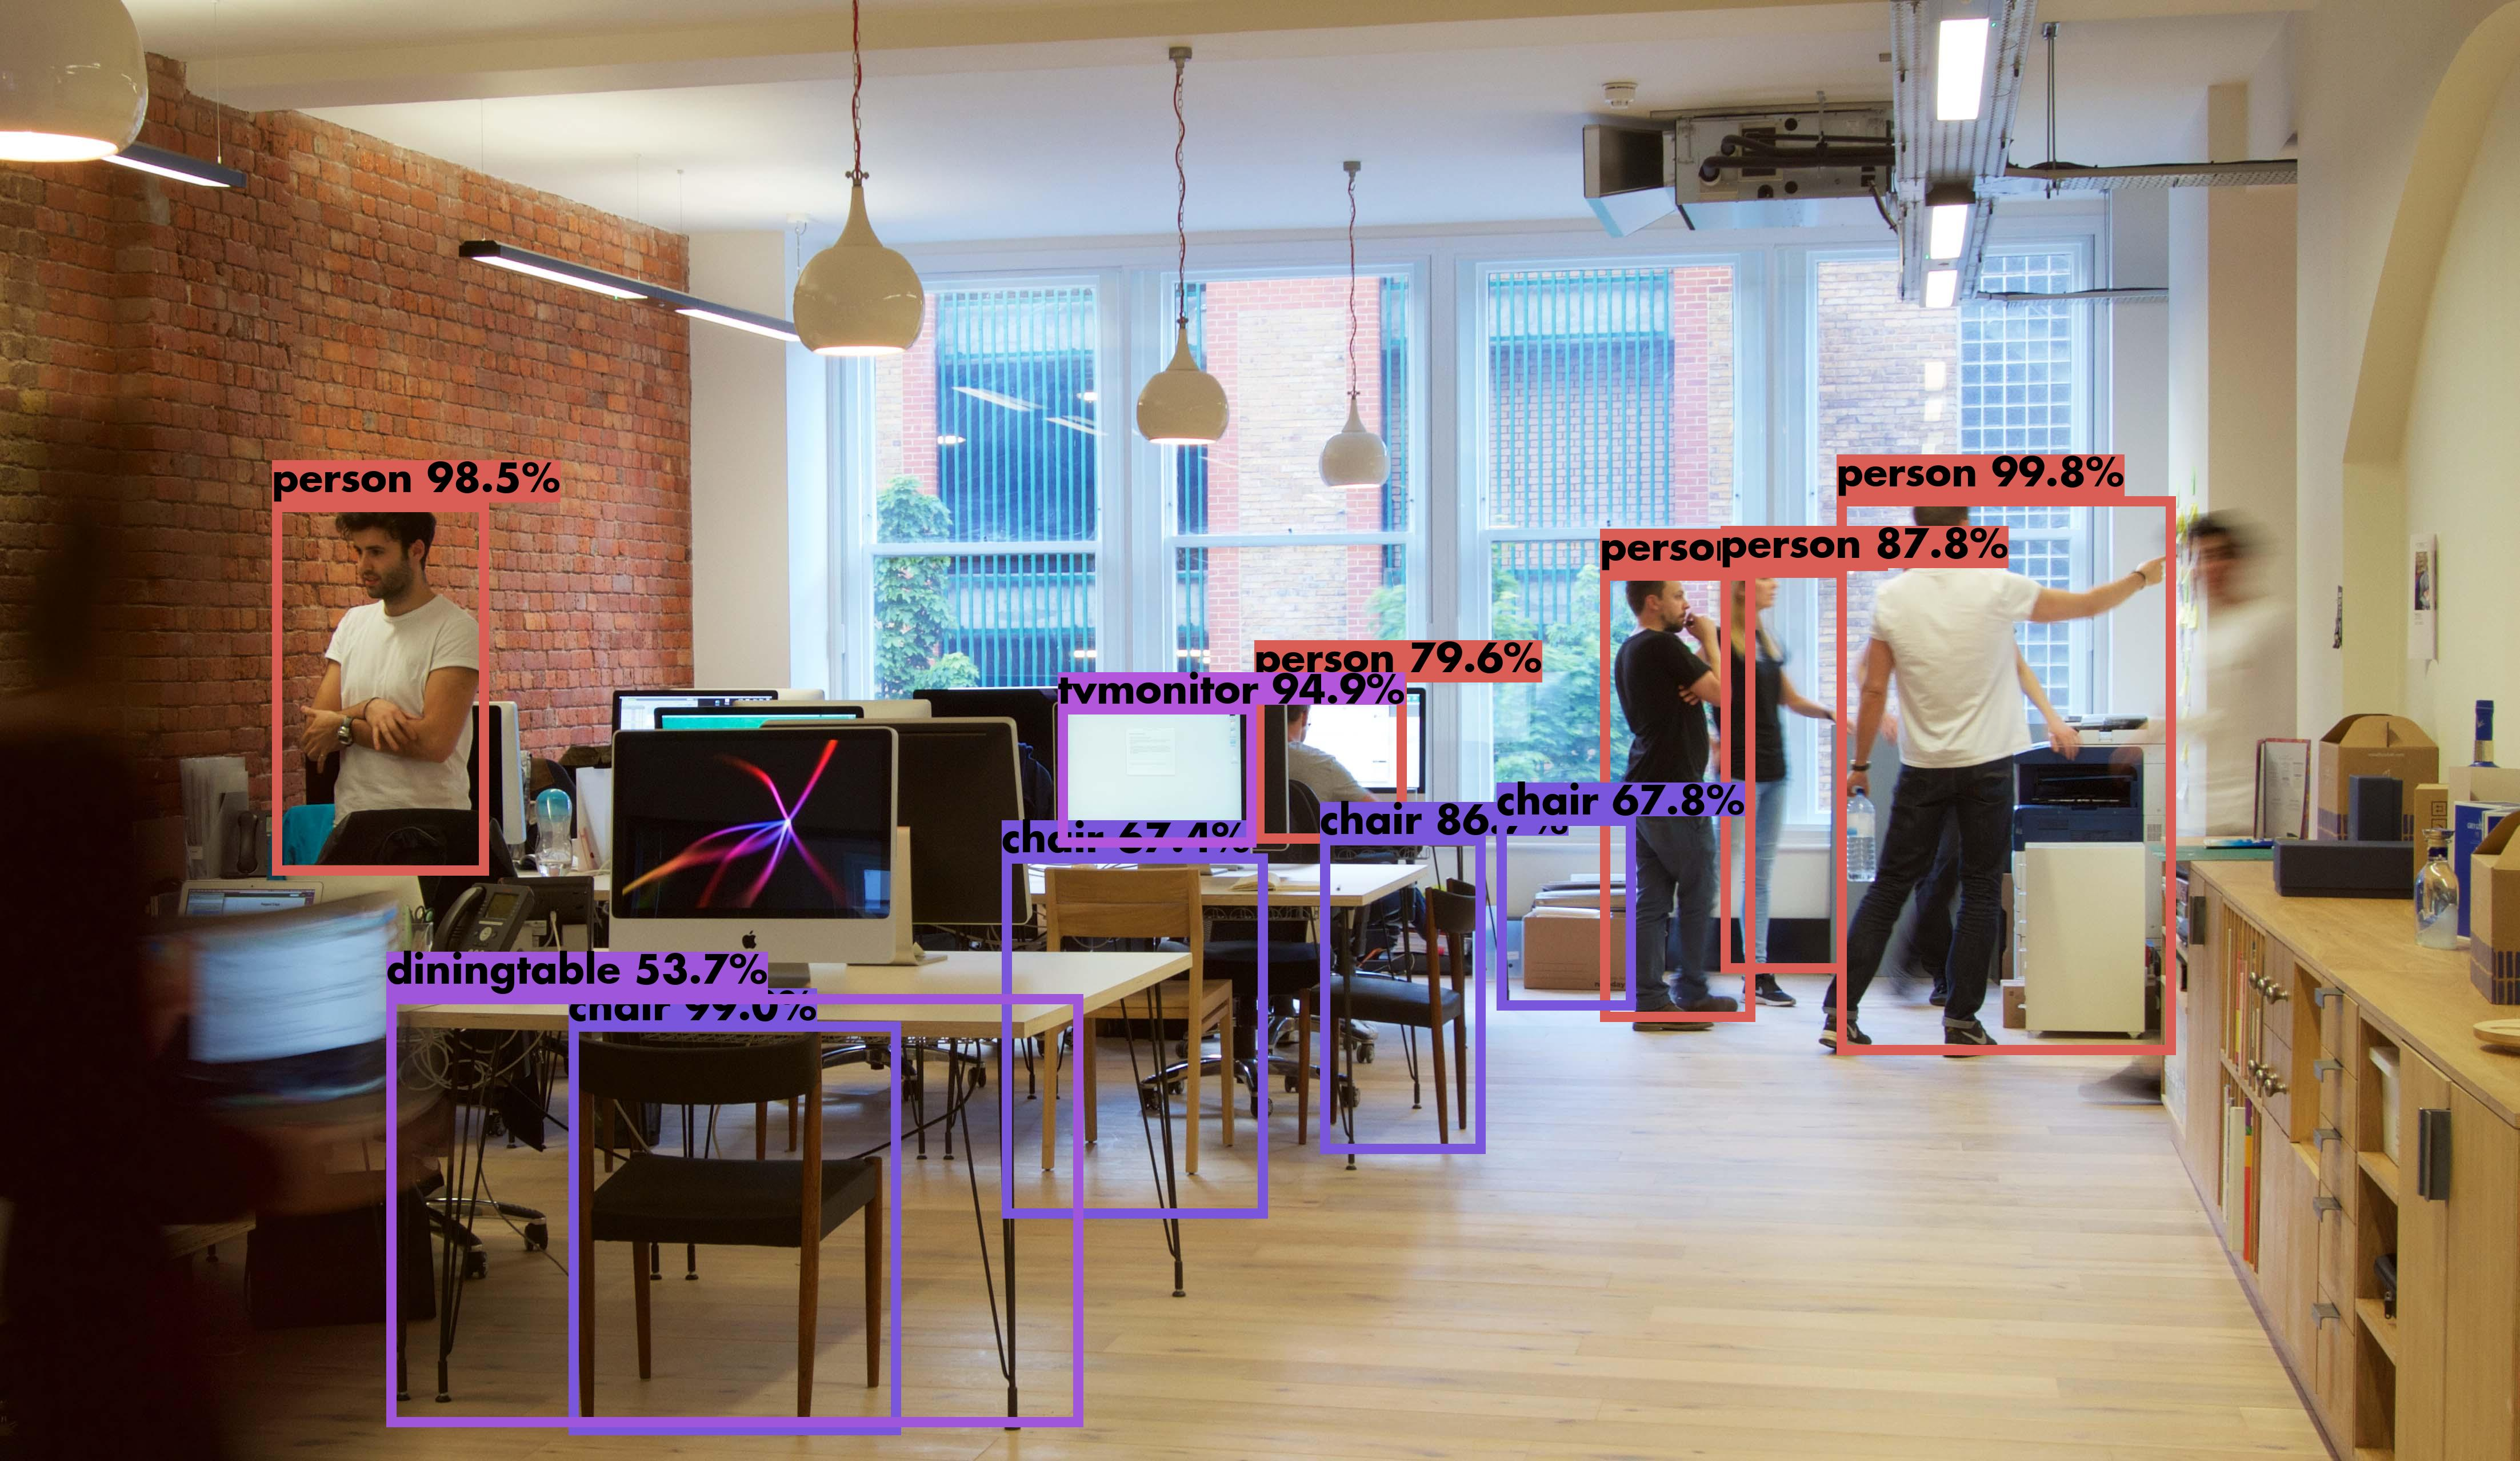

In [7]:
# from IPython.display import Image
# Image("detections/detection_1.jpg")